In [2]:

# Regular EDA and plotting lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalutions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [8]:
df = pd.read_csv("Heart_Disease.csv")


In [9]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


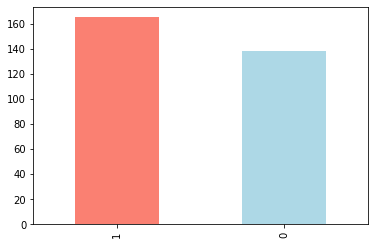

In [10]:
df["target"].value_counts()

df["target"].value_counts().plot(kind = "bar", color=["salmon","lightblue"]);


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [26]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [27]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)



sex,0,1
target,,
0,24,114
1,72,93


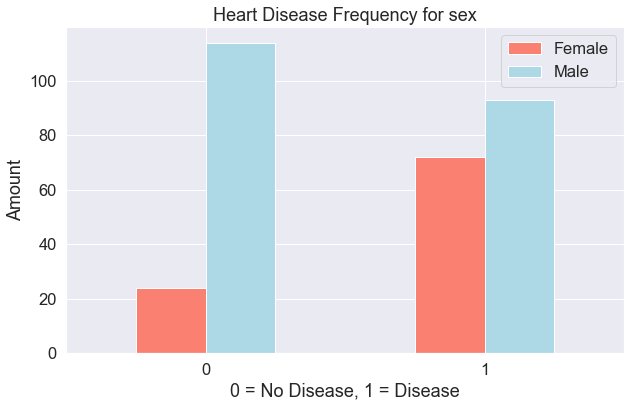

In [28]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);


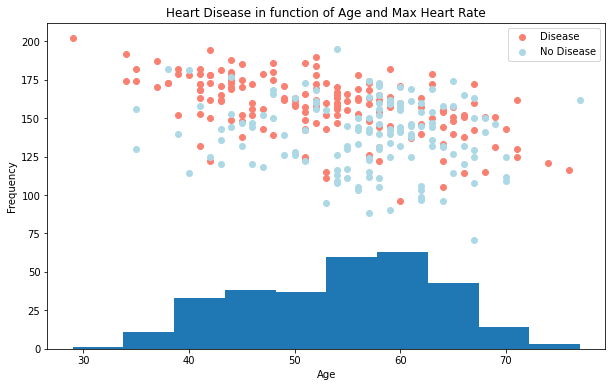

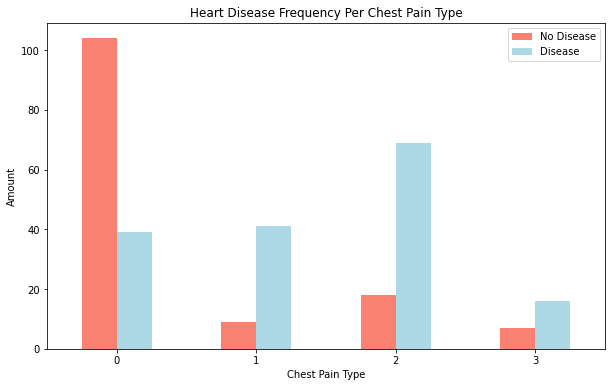

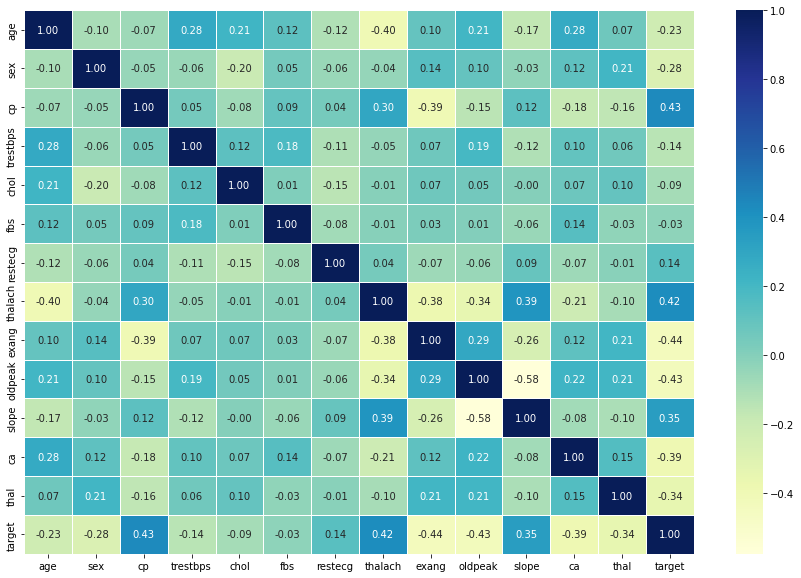

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Check the distribution of the age column with a histogram
df.age.plot.hist();
pd.crosstab(df.cp, df.target)

# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

# Make a correlation matrix
df.corr()

# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");



In [16]:
# Modelling
df.head()

# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

X.head()
y.head()

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)




In [17]:
# Put models in a dictionary
models ={"KNN": KNeighborsClassifier()}
          # Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores



{'KNN': 0.6593406593406593}

In [29]:
# Import all the tools we need

# Regular EDA and plotting lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

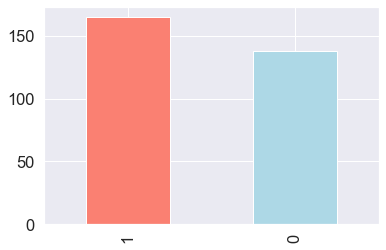

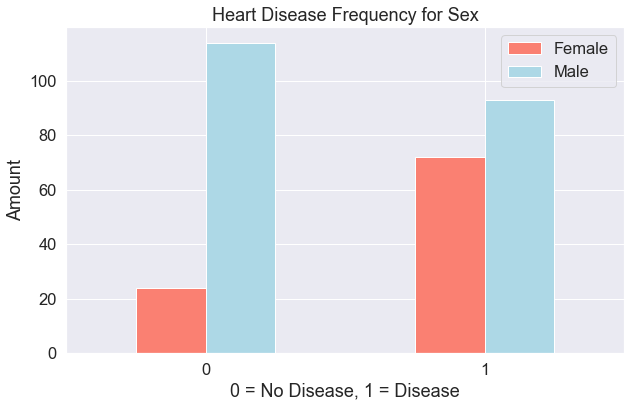

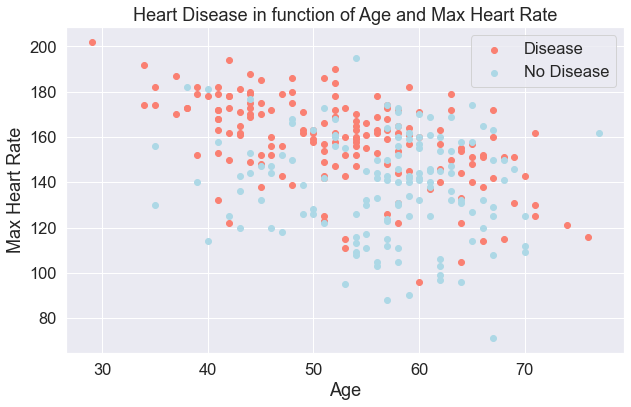

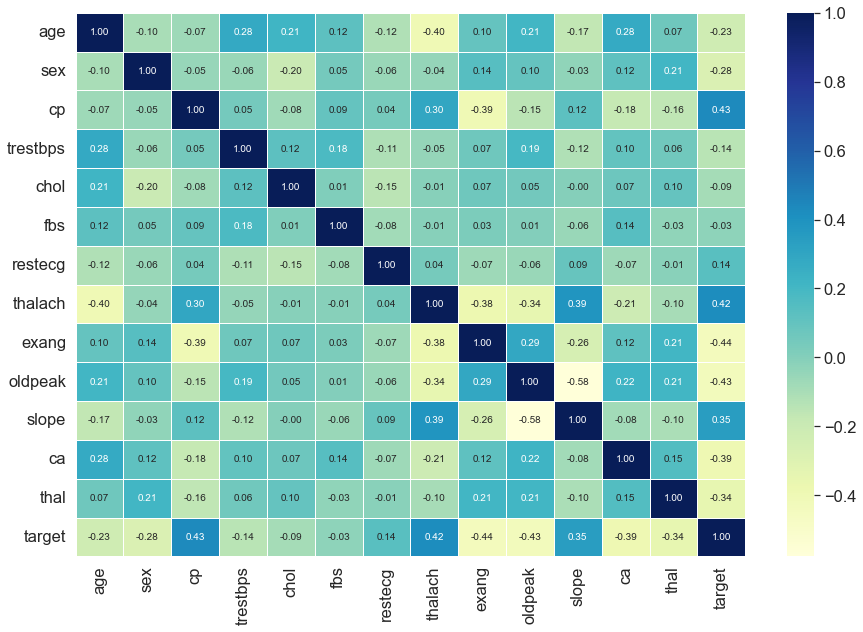

In [31]:


# EDA (Exploratory Data Analysis)
df.head()
df.tail()
df["target"].value_counts()

# Plot target value distribution
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

df.info()
df.isna().sum()
df.describe()

# EDA: Sex distribution
df.sex.value_counts()

# Compare target column with sex column
pd.crosstab(df.target, df.sex)

# Plot crosstab of target vs sex
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

# Scatter plot between age and max heart rate
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu", ax=ax)



In [42]:
# Modelling
X = df.drop("target", axis=1)
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Dictionary of models to train
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [44]:
# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores


In [45]:
# Fit models and evaluate them
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print(model_scores)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344, 'Logistic Regression': 0.8852459016393442, 'SVM': 0.7049180327868853, 'Naive Bayes': 0.8688524590163934, 'Random Forest': 0.8360655737704918, 'Gradient Boosting': 0.7704918032786885}


##### Save the Logistic Regression Model

In [49]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Heart_Disease.csv")


# Prepare data
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
y_preds = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds))

# Save the model using joblib
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



['scaler.pkl']

In [59]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Heart_Disease.csv")

# Prepare data
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
y_preds = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds))

# Save the model using joblib
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Identify important features using coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute coefficient value
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=False)

print(coefficients)


              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

     Feature  Coefficient  Importance
2         cp     0.818004    0.818004
11        ca    -0.790127    0.790127
1        sex    -0.783065    0.783065
9    oldpeak    -0.680978    0.680978
12      thal    -0.565590    0.565590
8      exang    -0.517491    0.517491
10     slope     0.435525    0.435525
7    thalach     0.395181    0.395181
6    restecg     0.284141    0.284141
3   trestbps    -0.273493    0.273493
4       chol    -0.175085    0.175085
5        fbs     0.090465    0.090465
0        age    -0.085493    0.085493


In [60]:
# Identify important features using coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute coefficient value
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=False)

# Save the important features to a CSV file
coefficients.to_csv('important_features.csv', index=False)

# Print the important features
print(coefficients)


     Feature  Coefficient  Importance
2         cp     0.818004    0.818004
11        ca    -0.790127    0.790127
1        sex    -0.783065    0.783065
9    oldpeak    -0.680978    0.680978
12      thal    -0.565590    0.565590
8      exang    -0.517491    0.517491
10     slope     0.435525    0.435525
7    thalach     0.395181    0.395181
6    restecg     0.284141    0.284141
3   trestbps    -0.273493    0.273493
4       chol    -0.175085    0.175085
5        fbs     0.090465    0.090465
0        age    -0.085493    0.085493


###### Streamlit Web App

In [62]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the saved model and scaler
logreg = joblib.load('logreg_model.pkl')
scaler = joblib.load('scaler.pkl')

# Streamlit interface
st.title('Heart Disease Prediction Web App')

# Display important features
st.header('Important Features from the Logistic Regression Model')
coefficients = pd.read_csv("important_features.csv")  # Assuming saved feature importance
st.write(coefficients)

# User input for prediction
st.header('Enter User Data for Prediction')

# Create inputs for all 13 features in the dataset
age = st.number_input('Age', min_value=20, max_value=120, value=50)
sex = st.selectbox('Sex', ['Male', 'Female'])
cp = st.selectbox('Chest Pain Type', [0, 1, 2, 3])
trestbps = st.number_input('Resting Blood Pressure (mm Hg)', min_value=80, max_value=200, value=120)
chol = st.number_input('Serum Cholesterol (mg/dL)', min_value=100, max_value=600, value=200)
fbs = st.selectbox('Fasting Blood Sugar > 120 mg/dL', [0, 1])  # 0 = No, 1 = Yes
restecg = st.selectbox('Resting Electrocardiographic Results', [0, 1, 2])
thalach = st.number_input('Max Heart Rate Achieved', min_value=50, max_value=220, value=150)
exang = st.selectbox('Exercise Induced Angina', [0, 1])  # 0 = No, 1 = Yes
oldpeak = st.number_input('ST Depression Induced by Exercise', value=1.0)
slope = st.selectbox('Slope of Peak Exercise ST Segment', [0, 1, 2])
ca = st.number_input('Number of Major Vessels Colored by Fluoroscopy', min_value=0, max_value=4, value=1)
thal = st.selectbox('Thalassemia', [0, 1, 2, 3])

# Convert categorical inputs to numeric values
sex = 1 if sex == 'Male' else 0

# Prepare the input data
user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
user_data_scaled = scaler.transform(user_data)

# Make a prediction
prediction = logreg.predict(user_data_scaled)

# Show the result
st.subheader("Prediction Result")
if prediction[0] == 1:
    st.write("The model predicts: **Heart Disease** 😞")
else:
    st.write("The model predicts: **No Heart Disease** 😊")


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
